<a href="https://colab.research.google.com/github/GabrielEdreira/Tareas_PRIA/blob/main/RNA_GabrielAntonioEdreiraGarcia/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

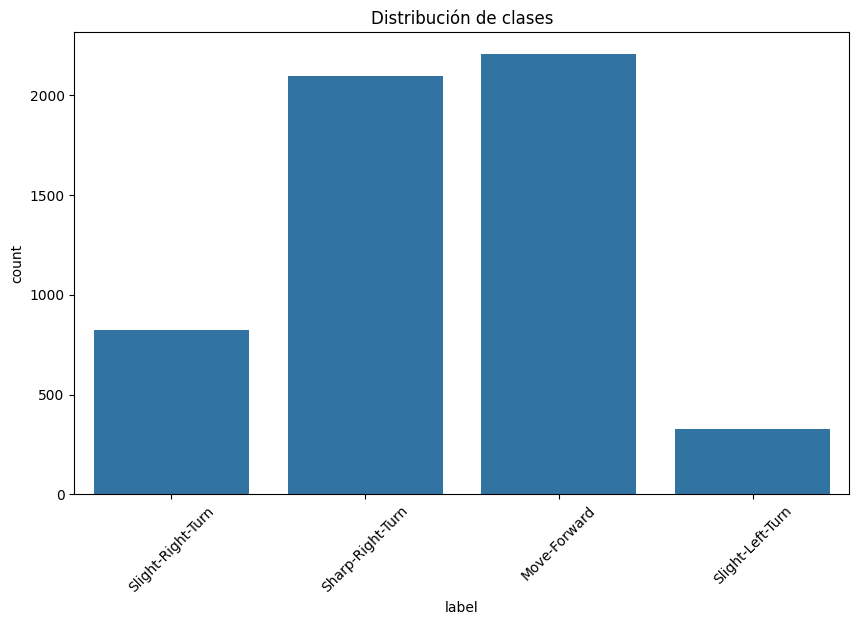

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4610 - loss: 1.1778 - val_accuracy: 0.6976 - val_loss: 0.7610
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6866 - loss: 0.7672 - val_accuracy: 0.7565 - val_loss: 0.6361
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7215 - loss: 0.6539 - val_accuracy: 0.7749 - val_loss: 0.5704
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7632 - loss: 0.5910 - val_accuracy: 0.7945 - val_loss: 0.5236
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7959 - loss: 0.5299 - val_accuracy: 0.8037 - val_loss: 0.4862
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7892 - loss: 0.5251 - val_accuracy: 0.8259 - val_loss: 0.4552
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8079 - loss: 0.4758 - val_accuracy: 0.8351 - val_loss: 0.4388
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8215 - loss: 0.4519 - val_accuracy: 0.8390 - val_loss: 0.4158
Epo

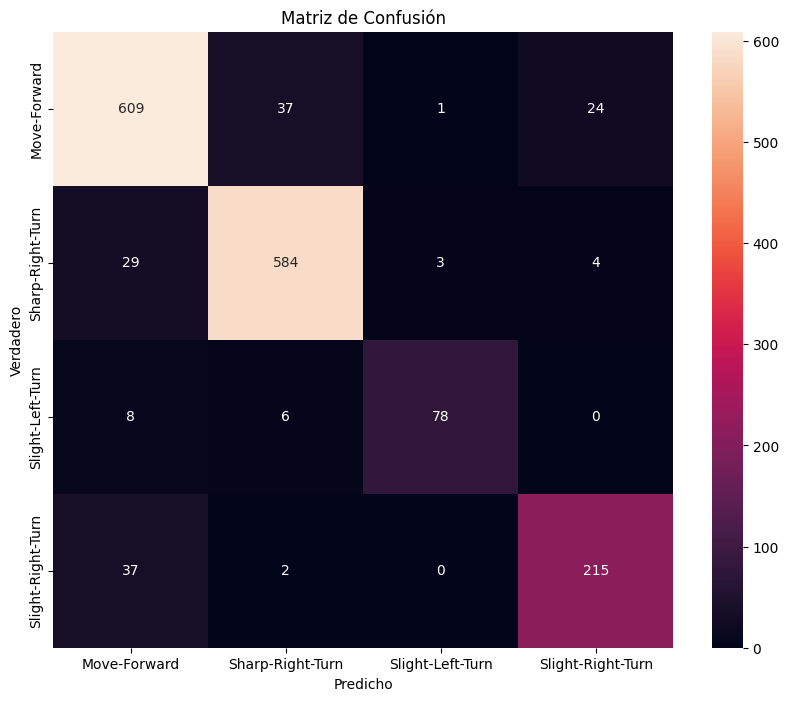

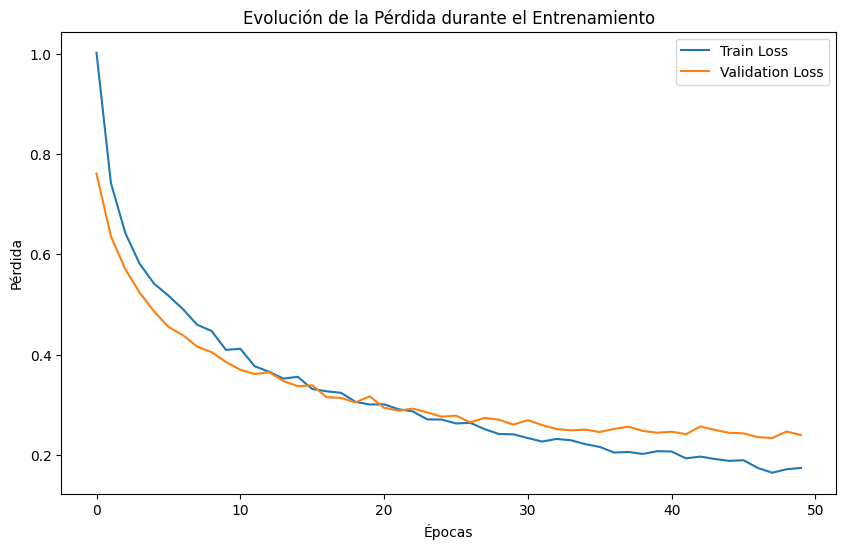

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar los datos
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/sensor_readings_24.csv', header=None)
df.columns = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
              's10', 's11', 's12', 's13', 's14', 's15', 's16',
              's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 'label']

# Visualizar la distribución de clases
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title('Distribución de clases')
plt.xticks(rotation=45)
plt.show()

# Preprocesamiento
X = df.drop('label', axis=1)
y = df['label']

# Codificar las etiquetas
le = LabelEncoder()
y = le.fit_transform(y)
num_classes = len(le.classes_)
y_categorical = to_categorical(y)  # Convertir a one-hot encoding para Keras

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear modelo Keras
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # Regularización
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluación
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print("Accuracy:", accuracy_score(y_test_labels, y_pred))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred, target_names=le.classes_))

# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

# Gráfico de pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


=== Data Shapes ===
X_train: (20414, 32, 32) (dtype: float32)
y_train: (20414,)
X_test: (5104, 32, 32)
y_test: (5104,)

Reshaping 3D data to 2D...
New shapes - X_train: (20414, 1024), X_test: (5104, 1024)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,994 (1.17 MB)

 Trainable params: 305,098 (1.16 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1570 - loss: 2.6797 - precision: 0.1774 - recall: 0.0316 - val_accuracy: 0.2650 - val_loss: 1.9990 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2654 - loss: 2.0222 - precision: 0.3935 - recall: 0.0565 - val_accuracy: 0.2378 - val_loss: 2.1982 - val_precision: 0.4744 - val_recall: 0.0431 - learning_rate: 0.0010
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3151 - loss: 1.8420 - precision: 0.4777 - recall: 0.0705 - val_accuracy: 0.2692 - val_loss: 1.9493 - val_precision: 0.3967 - val_recall: 0.1553 - learning_rate: 0.0010
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3362 - loss: 1.7677 - precision: 0.5734 - recall: 0.0971 - val_accuracy: 0.3603 - val_loss: 1.7293 - val_precision: 0.5902 - val_recall: 0.1002 - learning_rate: 0.0010
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step 

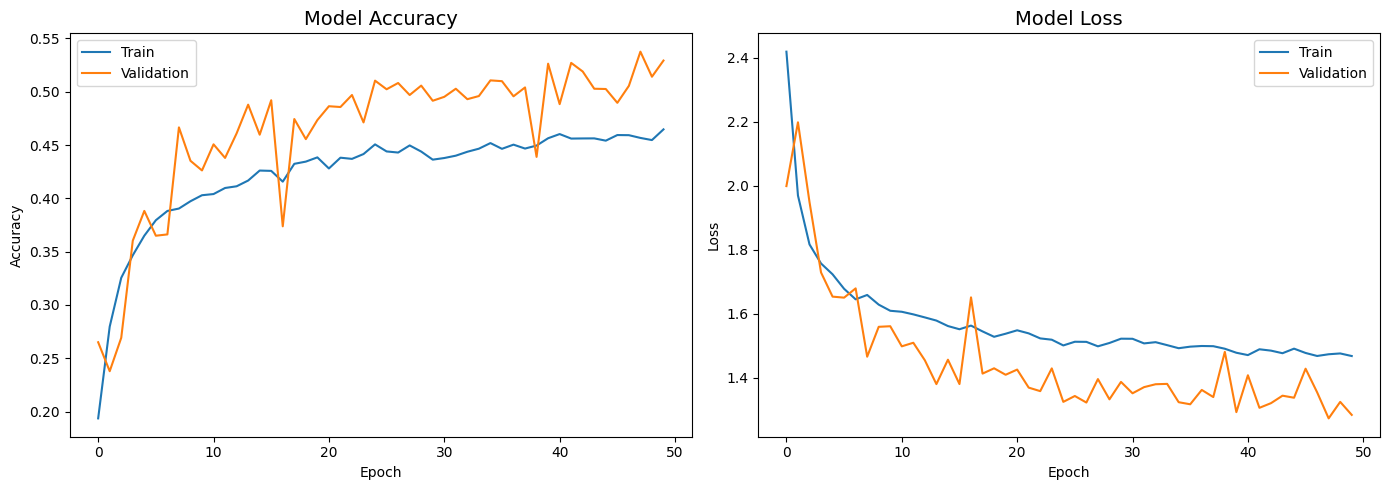


Model saved to ./drive/MyDrive/Colab Notebooks/Processed/audio_classification_model.keras


In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ---- 2. Data Loading ----
archive = "./drive/MyDrive/Colab Notebooks/Processed/"

# Load data with error handling
try:
    X_train = np.load(f'{archive}x_train.npy')
    y_train = np.load(f'{archive}y_train.npy')
    X_test = np.load(f'{archive}x_test.npy')
    y_test = np.load(f'{archive}y_test.npy')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    raise

# ---- 3. Data Inspection ----
print("\n=== Data Shapes ===")
print(f"X_train: {X_train.shape} (dtype: {X_train.dtype})")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

# ---- 4. Data Preprocessing ----
# Check if labels need encoding
if y_train.dtype == object or y_train.ndim == 1:
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)

# Normalize audio features
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# ---- 5. Data Reshaping ----
# Fix shape mismatch: Flatten if needed
if X_train.ndim == 3:
    print("\nReshaping 3D data to 2D...")
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    print(f"New shapes - X_train: {X_train.shape}, X_test: {X_test.shape}")

# Create validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

# ---- 6. Model Architecture ----
def create_audio_model(input_shape, num_classes):
    model = Sequential([
        layers.Dense(256, activation='relu', input_shape=input_shape,
                    kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(128, activation='relu',
                    kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        layers.Dense(64, activation='relu',
                    kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )
    return model

# Initialize model
num_classes = y_train.shape[1]
model = create_audio_model((X_train.shape[1],), num_classes)
model.summary()

# ---- 7. Training Setup ----
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=1e-6
)

# ---- 8. Model Training ----
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ---- 9. Evaluation ----
def evaluate_model(model, X_test, y_test):
    # Convert one-hot to labels
    y_true = np.argmax(y_test, axis=1)
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Metrics
    test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{'Metric':<15} | {'Value':>10}")
    print("-" * 28)
    print(f"{'Accuracy':<15} | {test_acc:.4f}")
    print(f"{'Loss':<15} | {test_loss:.4f}")
    print(f"{'Precision':<15} | {test_precision:.4f}")
    print(f"{'Recall':<15} | {test_recall:.4f}")

    # Fix: Convert numerical classes to strings
    class_names = [str(cls) for cls in le.classes_]  # Convert to strings

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))  # Use string labels

    # Confusion Matrix (keep original labels)
    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,  # Use string labels
                yticklabels=class_names)  # Use string labels
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# ---- 10. Training Visualization ----
def plot_training_history(history):
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy', fontsize=14)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss', fontsize=14)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# ---- 11. Model Saving ----
model.save(f'{archive}audio_classification_model.keras')
print(f"\nModel saved to {archive}audio_classification_model.keras")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')